## Step 2: Define the parameters and paths

Next, we will define the paths for the video and the output locations. Since your input file is clip1.mp4, we’ll update the notebook to use this file.

In [ ]:
# Activate the environment and include the main script
import Pkg; Pkg.add("Images")
Pkg.add("VideoIO")
Pkg.add("Agents")
using Pkg
Pkg.activate("..")
# Include local files directly
include("../src/distortion.jl")
include("../src/filehandler.jl")
include("../src/abm_model.jl")
include("../src/utils.jl")
include("../src/main.jl")

In [52]:
# Activate the project environment (dependencies are managed in Project.toml)
using Pkg
Pkg.activate("..")

# Include necessary local scripts
include("../src/filehandler.jl")
include("../src/distortion.jl")
include("../src/abm_model.jl")
include("../src/utils.jl")

  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/DataWithAlex/ABM-Project-Frank-Alex-COP6526/ABM`


Main.Utils

### Video Frame Extraction and Saving

In this section, we are processing a video to extract its individual frames and save them as image files. Here's a breakdown of the steps performed:

1. **Input Video**: The input video (`converted_clip1.mp4`) is loaded from the `input` directory.
2. **Frame Extraction**: The video is processed frame by frame using the `VideoIO` library, and each frame is extracted based on the provided frame rate (20 frames per second).
3. **Saving Frames**: All the extracted frames are saved as individual `.png` image files in the `output/frames/` directory. Each frame is named sequentially (e.g., `frame_1.png`, `frame_2.png`, etc.).
4. **Optional Video Saving**: The extracted frames can also be recombined into a new video and saved to the `output` directory (`output_clip1.mp4`).
5. **Verification**: We display the first frame of the extracted frames to verify that the extraction was successful.

This process is useful for analyzing individual frames of a video, applying image transformations, or reprocessing the video in different formats or frame rates.

Output frames directory already exists: ../output/frames/
Video file found at path: ../input/converted_clip1.mp4
Opening video file: ../input/converted_clip1.mp4
Video opened successfully.
Total frames in video: 64
Video Resolution: 1920x1080
Total frames extracted: 64
Number of frames extracted: 64
All frames have been saved to: ../output/frames/
Processed video saved at: ../output/output_clip1.mp4
Output video saved successfully at: ../output/output_clip1.mp4


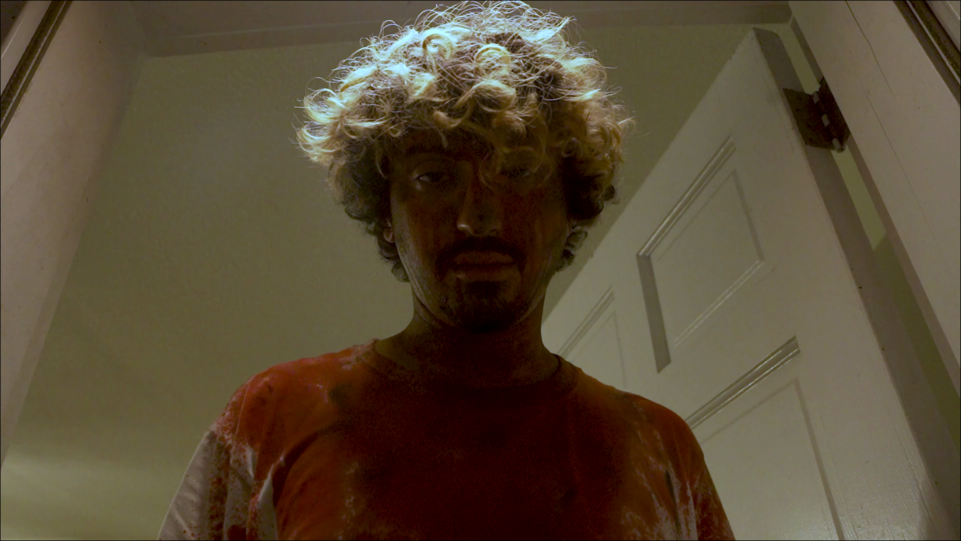

In [41]:
# Set the paths for the input video and output video
video_path = "../input/converted_clip1.mp4"  # The converted input video
output_path = "../output/output_clip1.mp4"  # Where the output video will be saved
output_frames_folder = "../output/frames/"  # Where the frames will be saved
fps = 30  # Frame rate for processing the video

# Ensure output folder for frames exists
if !isdir(output_frames_folder)
    mkpath(output_frames_folder)
    println("Created output frames directory: ", output_frames_folder)
else
    println("Output frames directory already exists: ", output_frames_folder)
end

# Check if the video file exists
if !isfile(video_path)
    println("Error: Video file not found at path ", video_path)
else
    println("Video file found at path: ", video_path)

    # Load video and extract frames
    frames = FileHandler.video_to_frames(video_path, "../input", fps)

    # Check the number of frames extracted
    println("Number of frames extracted: ", length(frames))

    # If frames are extracted, save each frame to the output folder and display the first frame
    if length(frames) > 0
        using Images

        # Save each frame as an image
        for (i, frame) in enumerate(frames)
            frame_output_path = joinpath(output_frames_folder, "frame_$(i).png")
            save(frame_output_path, frame)
        end

        println("All frames have been saved to: ", output_frames_folder)

        # Display the first frame for confirmation
        first_frame = frames[1]
        display(first_frame)
    else
        println("Error: No frames were extracted from the video.")
    end

    # Optionally, save the frames back to a video
    FileHandler.frames_to_video(frames, output_path, fps)
    println("Processed video saved at: ", output_path)
end

# Check if the output video file was saved successfully
if isfile(output_path)
    println("Output video saved successfully at: ", output_path)
else
    println("Error: Failed to save the video.")
end

# Frame Extraction, Transformation, and Distortion Process

This section of the notebook focuses on loading a video frame, converting it into different color representations (RGB and HSV), and applying a custom distortion to the frame using a pixel manipulation technique. Here's a breakdown of each step:

### Step 1: Load the First Extracted Frame

The code begins by loading the first frame from the previously extracted video frames. The frame is represented as an RGB image where each pixel contains three values representing the Red, Green, and Blue color channels.

```julia
first_frame = frames[1]
```

This first_frame variable holds the pixel data of the first frame from the video, which will be used for subsequent transformations and distortions.

### Step 2: Convert the Frame to RGB and HSV Matrices

Next, the loaded frame is converted into two different color representations: RGB and HSV.

- RGB (Red, Green, Blue): This is the color model where each pixel is represented by a combination of red, green, and blue intensities.
- HSV (Hue, Saturation, Value): This color model represents colors in terms of their hue (the color type), saturation (the intensity or purity of the color), and value (brightness).

The conversion is done using the frames_to_matrices function, which outputs two matrices, one for the RGB representation and one for the HSV representation of the frame.

```julia
rgb_matrices, hsb_matrices = FileHandler.frames_to_matrices([first_frame])
```

In this case, the rgb_matrices[1] holds the RGB values for the first frame, while hsb_matrices[1] holds the corresponding HSV values.

### Step 3: Apply the Custom Pixel Distortion

Now, a custom distortion is applied to each pixel in the frame. The distortion is determined by a probabilistic rule based on the value (brightness) of each pixel in the HSV color model.

- For each pixel in the frame, a random number is generated.
- If the random number is below a threshold (which is based on the brightness of the pixel), the pixel is modified.
- The modification sets the color channel with the highest intensity to full brightness (1.0), while the other channels are set to zero. This results in the pixel being fully red, green, or blue, depending on which color channel was dominant.
- If the pixel doesn’t meet the distortion condition, it is set to black.

The apply_distortion_to_image function handles this process, pixel by pixel.

```julia
distorted_frame = Distortion.apply_distortion_to_image(rgb_matrices[1], hsb_matrices[1])
```

The result is a new distorted_frame, where some of the pixels have been altered according to the above rules, creating a visual effect of pixel distortion.

### Step 4: Display the Original and Distorted Frames

Finally, both the original frame and the distorted frame are displayed side by side to visualize the effect of the distortion. This allows us to compare the original pixel values with the manipulated version.

```julia
println("Displaying original frame:")
display(first_frame)

println("Displaying distorted frame:")
display(distorted_frame)
```

The original frame shows the video in its natural state, while the distorted frame reflects the custom pixel distortion applied through the algorithm.

This process effectively demonstrates how to manipulate and transform individual frames of a video using Julia’s image processing libraries. The distortion effect introduced here highlights pixel manipulation based on probabilistic rules, creating a unique transformation on each frame.

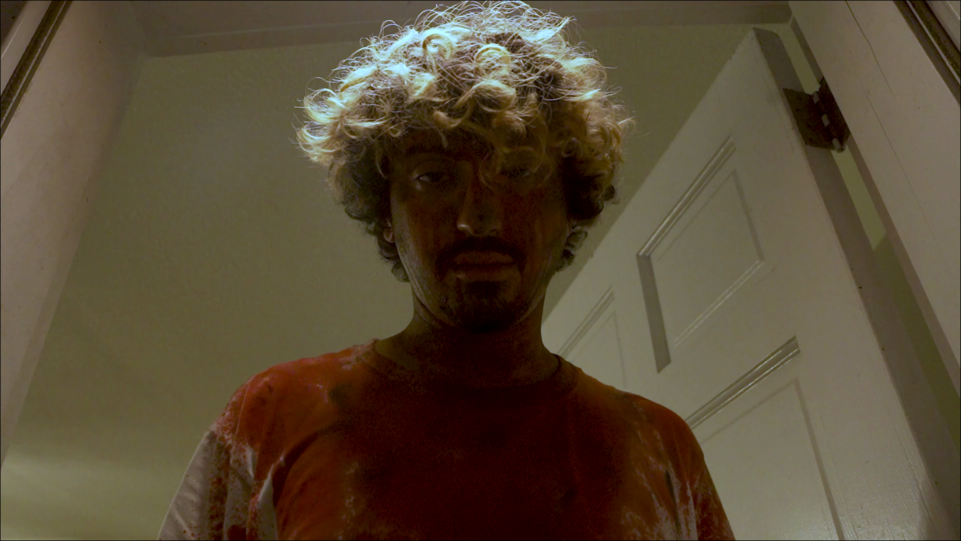

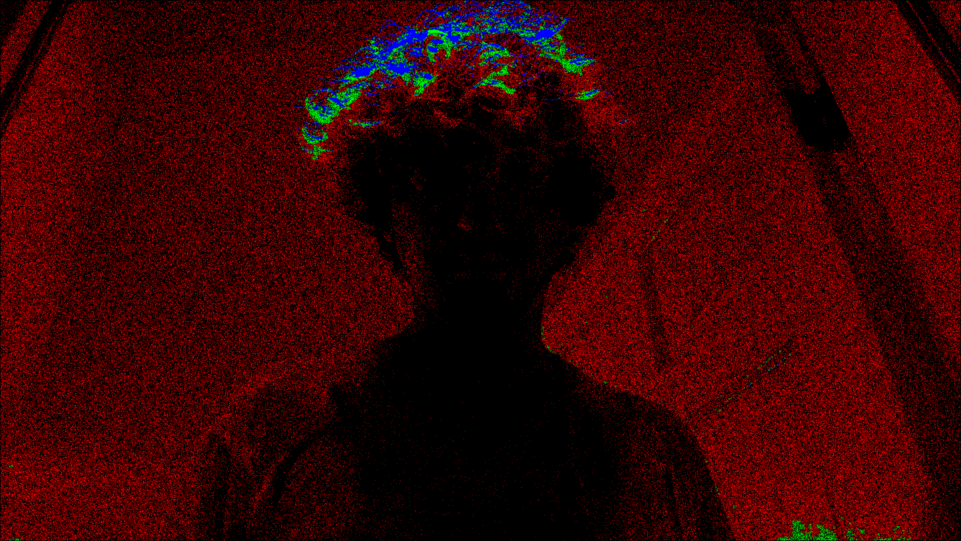

Displaying original frame:
Displaying distorted frame:


In [42]:
# Load the first extracted frame
first_frame = frames[1]

# Convert the frame to RGB and HSV matrices
rgb_matrices, hsb_matrices = FileHandler.frames_to_matrices([first_frame])

# Apply the distortion to the first frame
distorted_frame = Distortion.apply_distortion_to_image(rgb_matrices[1], hsb_matrices[1])

# Display the original and distorted frames
using Images

println("Displaying original frame:")
display(first_frame)

println("Displaying distorted frame:")
display(distorted_frame)

In [53]:
# Set the paths for the input video and output video
video_path = "../input/converted_clip1.mp4"  # The converted input video
output_path = "../output/distorted_clip1.mp4"  # Where the distorted output video will be saved
output_frames_folder = "../output/distorted_frames/"  # Where the distorted frames will be saved
fps = 30  # Frame rate for processing the video

# Ensure output folder for distorted frames exists
if !isdir(output_frames_folder)
    mkpath(output_frames_folder)
    println("Created output frames directory: ", output_frames_folder)
else
    println("Output frames directory already exists: ", output_frames_folder)
end

# Check if the video file exists
if !isfile(video_path)
    println("Error: Video file not found at path ", video_path)
else
    println("Video file found at path: ", video_path)

    # Load video and extract frames
    frames = FileHandler.video_to_frames(video_path, "../input", fps)

    # Check the number of frames extracted
    println("Number of frames extracted: ", length(frames))

    # If frames are extracted, apply distortion to each frame and save
    if length(frames) > 0
        using Images

        distorted_frames = []

        # Loop through each frame, apply distortion, and save
        for (i, frame) in enumerate(frames)
            rgb_matrices, hsb_matrices = FileHandler.frames_to_matrices([frame])
            distorted_frame = Distortion.apply_distortion_to_image(rgb_matrices[1], hsb_matrices[1])
            
            # Save each distorted frame as an image for reference (optional)
            frame_output_path = joinpath(output_frames_folder, "distorted_frame_$(i).png")
            save(frame_output_path, distorted_frame)
            
            # Collect the distorted frame for reassembly into video
            push!(distorted_frames, distorted_frame)
        end

        println("All distorted frames have been saved to: ", output_frames_folder)

        # Reassemble distorted frames back into a video
        FileHandler.frames_to_video(distorted_frames, output_path, fps)
        println("Distorted video saved at: ", output_path)
    else
        println("Error: No frames were extracted from the video.")
    end
end

# Check if the distorted video file was saved successfully
if isfile(output_path)
    println("Distorted video saved successfully at: ", output_path)
else
    println("Error: Failed to save the distorted video.")
end

Output frames directory already exists: ../output/distorted_frames/
Video file found at path: ../input/converted_clip1.mp4
Opening video file: ../input/converted_clip1.mp4
Video opened successfully.
Total frames in video: 64
Video Resolution: 1920x1080
Total frames extracted: 64
Number of frames extracted: 64
All distorted frames have been saved to: ../output/distorted_frames/
Video saved successfully at: ../output/distorted_clip1.mp4
Distorted video saved at: ../output/distorted_clip1.mp4
Distorted video saved successfully at: ../output/distorted_clip1.mp4
